In [1]:
notebook_fiducia = "Skandia Pensiones Y Cesantías S.A."
notebook_filename = "fondos_obligatorias.csv"
notebook_serie_name = "Fondo de Pensiones Conservador"

In [2]:
notebook_execution_date = "2021-06-01"
notebook_output_suffix = "1st_variation__"

In [3]:
import numpy as np
import pandas as pd

In [4]:
from financial_ml.core import *
from features.buy_daily_during_bullish import *

In [5]:
import os
import dotenv
dotenv.load_dotenv()
repo = os.environ.get('REPO')

In [6]:
date_suffix = notebook_execution_date

In [7]:
timeserie = CSV2TimeSerie(
    repo + "/data/" + notebook_filename, 
    notebook_serie_name,
    delimiter=",",
    fund_name=notebook_fiducia,
    fund_column="Nombre_Entidad",
    serie_column="Nombre_Fondo",
    date_column="Fecha",
    value_column="Valor Unidad"
).build(None)
timeserie.to_df()

,ds,y
0,2011-03-22,20075.84
1,2011-03-23,20083.91
2,2011-03-24,20059.91
3,2011-03-25,20032.85
4,2011-03-26,20035.91
...,...,...
3755,2021-07-02,42552.06
3756,2021-07-03,42561.34
3757,2021-07-04,42570.77
3758,2021-07-05,42580.02


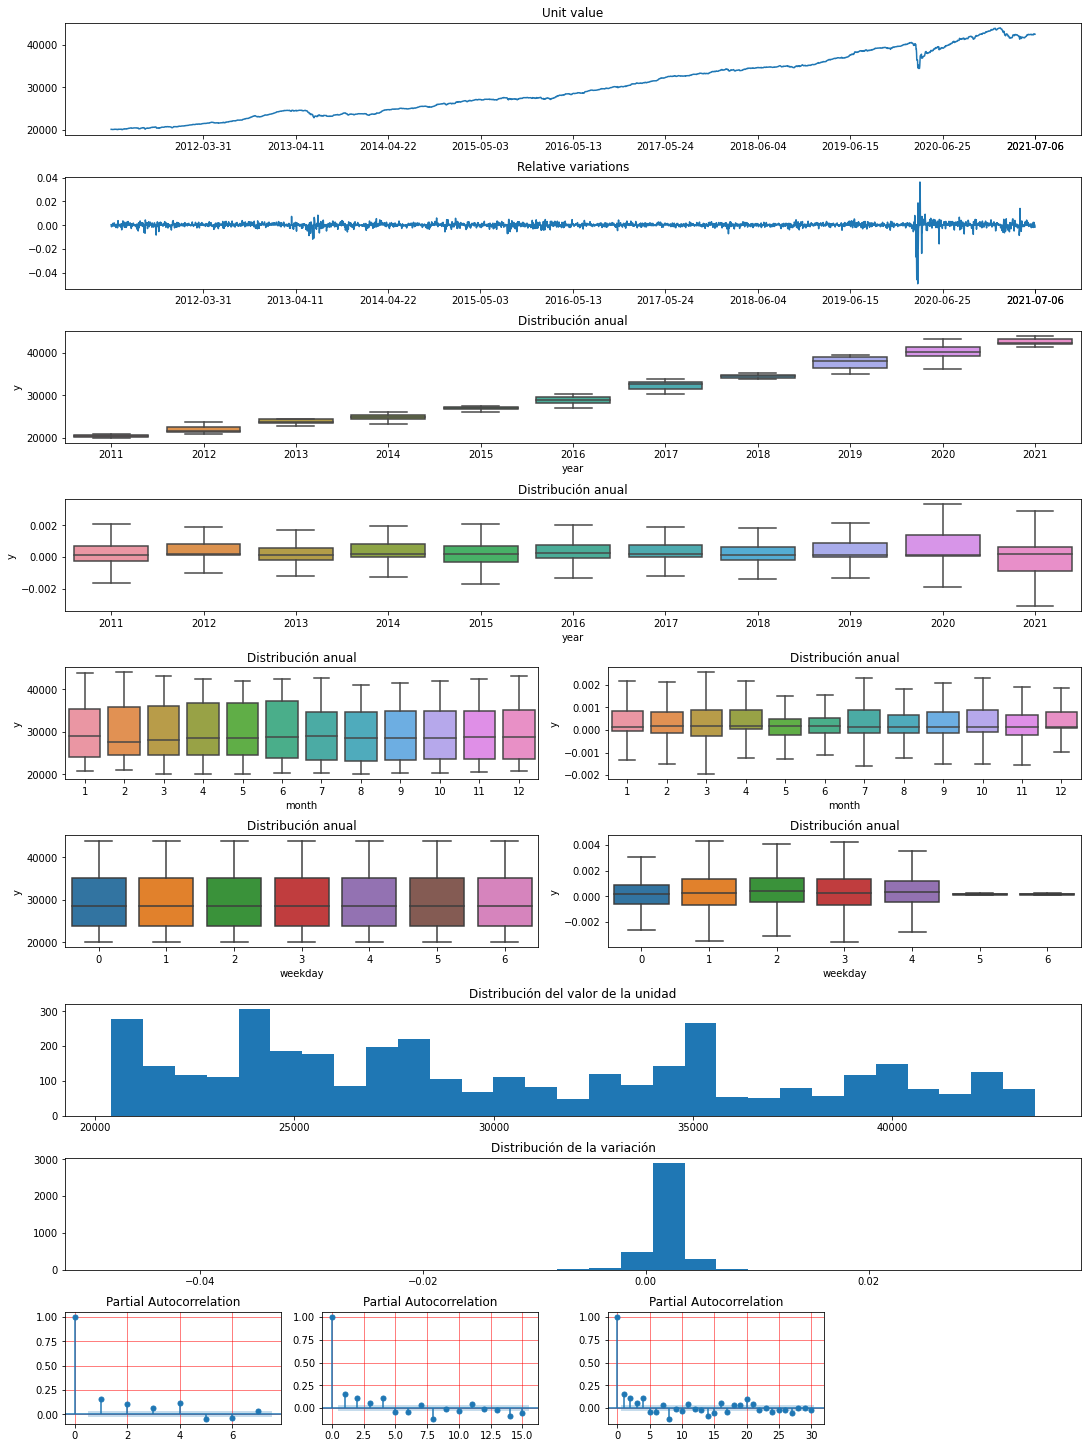

In [8]:
PyplotTimeSerie().plot(timeserie)

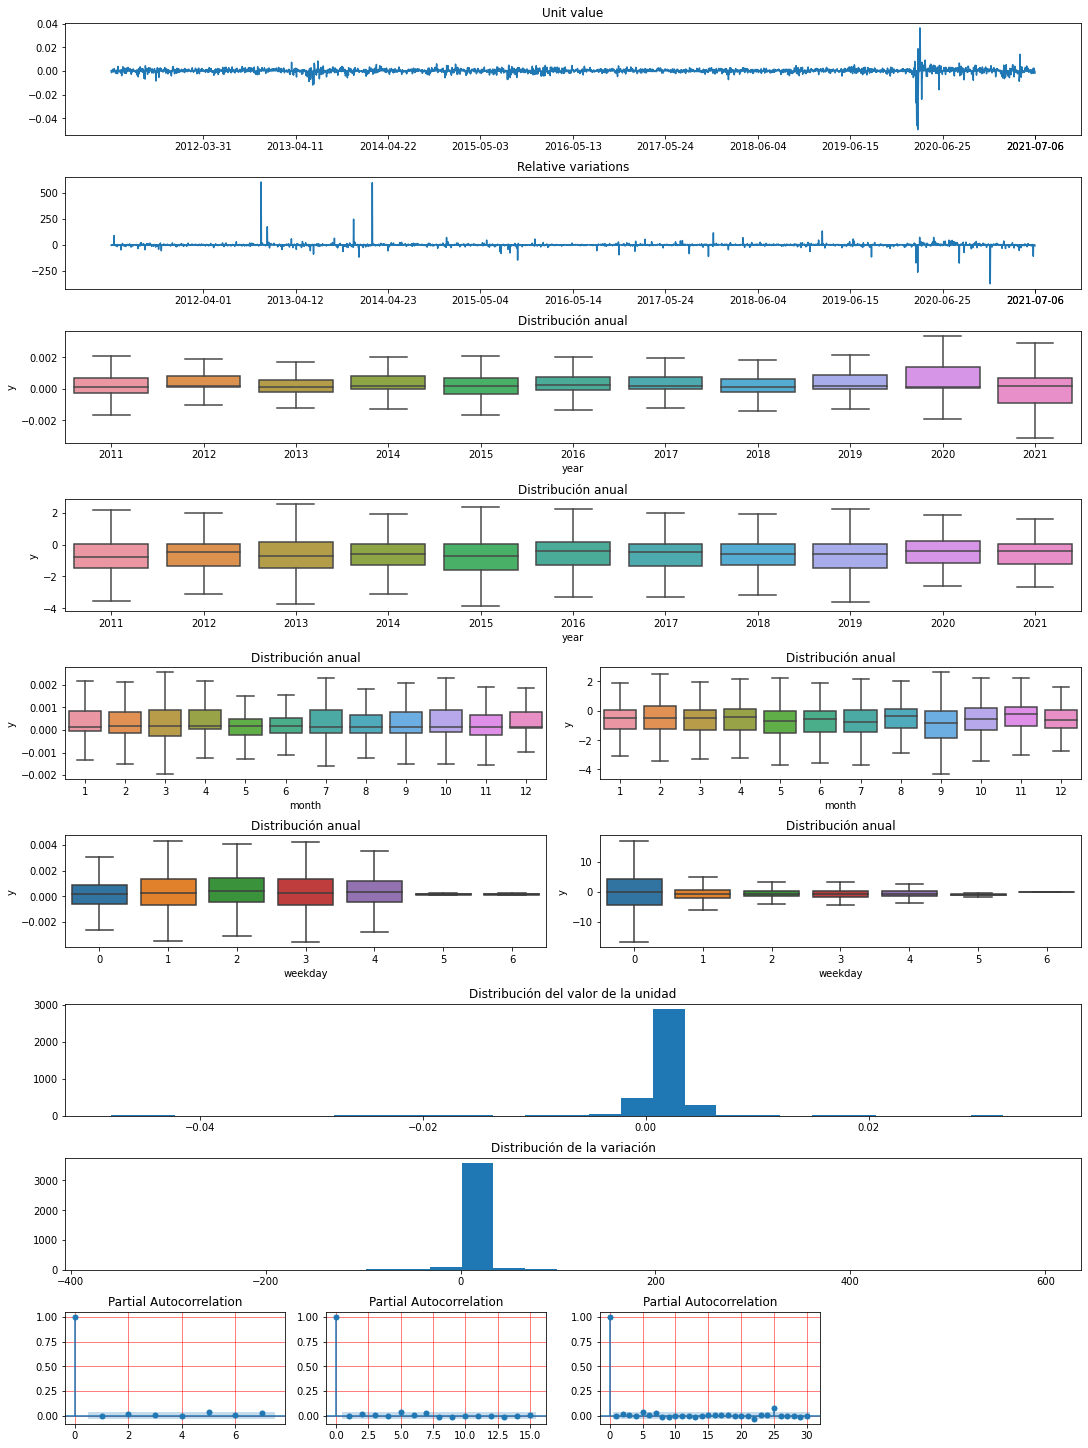

In [9]:
differentiated = Differentitator().transform(timeserie)
PyplotTimeSerie().plot(differentiated)

In [10]:
extractors = [
    WeeklyExtractor('last_week_sum', sum),
    WeeklyExtractor('last_week_mean', np.mean),
    WeeklyExtractor('last_week_std', np.std),
    MonthlyExtractor('last_month_sum', sum),
    MonthlyExtractor('last_month_mean', np.mean),
    MonthlyExtractor('last_month_std', np.std),
    YearlyExtractor('last_year_sum', sum),
    YearlyExtractor('last_year_mean', np.mean),
    YearlyExtractor('last_year_std', np.std)   
]

features = EDAFeaturesImpl(
    extractors,
    notebook_fiducia,
    notebook_serie_name,
    date_suffix,
    notebook_output_suffix
)

In [ ]:
features_builder = FeaturesBuilder(features)
features_builder.extract(differentiated)

In [ ]:
PyplotFeatures().plot(features)